This data set includes 5 years of Temperature Data for a Specific City having 1826
records .


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('MaunaLoaDailyTemps _1_.csv')
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


In [ ]:
df[df['AvgTemp']>50]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
24,2014-01-25,41.0,62.0,52.0,659,1811
107,2014-04-18,43.0,60.0,52.0,602,1841
108,2014-04-19,43.0,60.0,52.0,602,1841
114,2014-04-25,43.0,59.0,51.0,558,1843
115,2014-04-26,45.0,62.0,54.0,557,1844
...,...,...,...,...,...,...
1732,2018-09-29,43.0,61.0,52.0,613,1812
1733,2018-09-30,43.0,62.0,53.0,613,1811
1734,2018-10-01,40.0,63.0,52.0,613,1811
1737,2018-10-04,43.0,58.0,51.0,614,1808


1. How many Days Average temperature exceeds 50 celsius?
a. 175
b. 331
c. 278
d. 420

Ans : b. 331

2. Which year will be termed as the hottest year?
a. 2017
b. 2018
c. 2016
d. 2014

Ans : c. 2016

In [ ]:
df.groupby(df['DATE'].dt.year).mean().sort_values(by='AvgTemp',ascending=False)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2016,39.326027,55.605479,47.687671,607.210383,1822.81694
2015,38.961644,54.843836,47.145205,607.073973,1823.00274
2017,38.225275,54.571429,46.642857,607.073973,1823.00274
2018,38.573003,53.584022,46.316804,606.939560,1823.18956
2014,38.096154,53.964286,46.296703,607.073973,1823.00274


3. How you will be handling missing values in this dataset:
a. Fill up the null values with the median.
b. Fill up the null values with standard deviation.
c. Fill up the null values with the mean.
d. Fill up the null values with None.

Ans : c. Fill up the null values with the mean.

In [ ]:
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['AvgTemp']=df['AvgTemp'].fillna(df['AvgTemp'].mean())

In [ ]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1825 non-null   float64       
 2   MaxTemp  1825 non-null   float64       
 3   AvgTemp  1825 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


4. Which columns are not having any kind of relationship with the MaxTemp
column?
a. Sunset
b. MinTemp
c. Sunrise
d. Both A And C


Ans : d. Both A And C

In [ ]:
df.index=df['DATE']

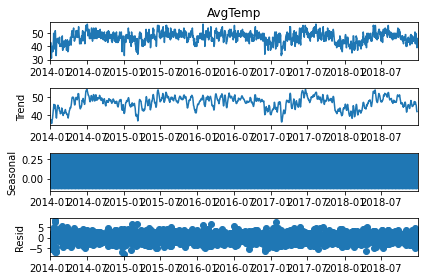

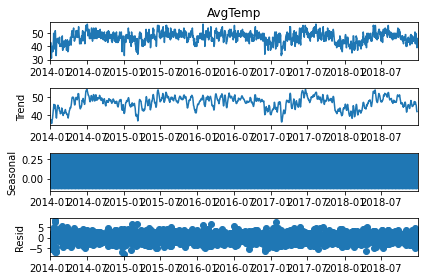

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['AvgTemp'])
result.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['AvgTemp'])
print(result)

(-6.594563113389786, 6.977825912592072e-09, 12, 1812, {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}, 8176.215795705775)


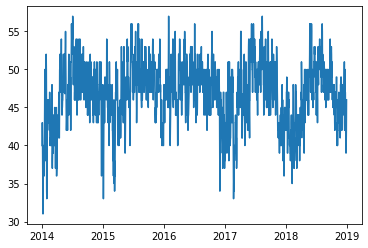

In [ ]:
plt.plot(df['DATE'],df['AvgTemp'])

In [ ]:
pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
order=auto_arima(df['AvgTemp'])
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4152.832
Date:                Sat, 14 Jan 2023   AIC                           8321.665
Time:                        00:53:59   BIC                           8365.739
Sample:                    01-01-2014   HQIC                          8337.923
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1593      0.352      3.295      0.001       0.470       1.849
ar.L1          0.9750      0.008    128.580      0.000       0.960       0.990
ma.L1         -0.1330      0.024     -5.647      0.000      -0.179      -0.087
ma.L2         -0.2206      0.024     -9.208      0.000      -0.268      -0.174
ma.L3         -0.1960      0.024     -8.256      0.000      -0.243      -0.149
ma.L4         -0.1401      0.023     -6.155      0.000      -0.185      -0.095
ma.L5         -0.0513      0.024     -2.098      0.036      -0.099      -0.003
sigma2         5.5212      0.173     31.948      0.000       5.183       5.860
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.15
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

5. Which of the following Order is the best order for ARIMA Model on top of the
Above Dataset for the target variable - AvgTemp
a. ARIMA(1,0,5)
b. ARIMA(0,0,5)
c. ARIMA(2,0,5)
d. ARIMA(3,0,2)

Ans : a. ARIMA(1,0,5)

6. What is the ADF(Augmented Dickey Fuller Test) used for detecting?
a. Normality
b. Seasonality
c. Stationary
d. Independence

Ans : c. Stationary

7. Which of the Statements is True ?
a. p>0.05, Data is stationary
b. p<0.05 Data is stationary
c. p<0.5 Data is Not Stationary
d. p>0.5 Data is stationary

Ans : b. p<0.05 Data is stationary

8. Determine the Average Error in Prediction By the Model?
a. 1-3%
b. 3-6%
c. 6-8%
d. 8-11%

Ans ◀b. 3-6%



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train=df['AvgTemp'].iloc[:1000]

test=df['AvgTemp'].iloc[1000:]

model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1000
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -2279.343
Date:                Sat, 14 Jan 2023   AIC                           4574.686
Time:                        00:54:03   BIC                           4613.948
Sample:                    01-01-2014   HQIC                          4589.609
                         - 09-26-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7389      1.041     44.887      0.000      44.698      48.780
ar.L1          0.9890      0.006    176.066      0.000       0.978       1.000
ma.L1         -0.1283      0.030     -4.226      0.000      -0.188      -0.069
ma.L2         -0.2724      0.031     -8.681      0.000      -0.334      -0.211
ma.L3         -0.2295      0.030     -7.526      0.000      -0.289      -0.170
ma.L4         -0.1408      0.030     -4.665      0.000      -0.200      -0.082
ma.L5         -0.0580      0.033     -1.778      0.075      -0.122       0.006
sigma2         5.5803      0.226     24.697      0.000       5.137       6.023
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.70
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions=model_fit.predict(len(train),len(train)+len(test)-1,dynamic=True)

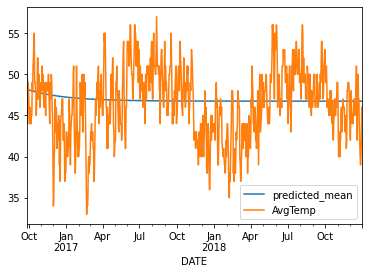

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = model_fit.predict(start, end,
                             typ = 'levels')#.rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test.plot(legend = True)

In [ ]:
predictions

2016-09-27    49.899164
2016-09-28    49.239564
2016-09-29    48.666816
2016-09-30    48.276700
2016-10-01    48.104387
                ...    
2018-12-26    46.739031
2018-12-27    46.739029
2018-12-28    46.739027
2018-12-29    46.739025
2018-12-30    46.739023
Freq: D, Name: predicted_mean, Length: 825, dtype: float64

In [ ]:
test

DATE
2016-09-27    44.0
2016-09-28    45.0
2016-09-29    48.0
2016-09-30    49.0
2016-10-01    48.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 825, dtype: float64

In [ ]:
xx=test.to_frame().join(predictions.to_frame(),on='DATE')

In [ ]:
xx

,AvgTemp,predicted_mean
DATE,,
2016-09-27,44.0,49.899164
2016-09-28,45.0,49.239564
2016-09-29,48.0,48.666816
2016-09-30,49.0,48.276700
2016-10-01,48.0,48.104387
...,...,...
2018-12-26,40.0,46.739031
2018-12-27,39.0,46.739029
2018-12-28,40.0,46.739027


In [ ]:
xx['diff']=xx['AvgTemp']-xx['predicted_mean']

In [ ]:
xx['diff'].sum()/825

-0.47316966710856573

In [ ]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error,accuracy_score
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test, predictions))


# Calculate mean squared error
mean_squared_error(test, predictions)


4.302824663080333


18.51430008121238

9. What is the Coefficient of AR of the above model for the target variable Avg
Temp?
a. 0.90 to 1.0
b. 0.50 to 0.60
c. 0.60 to 0.70
d. 0.30 to 0.40

Ans:a. 0.90 to 1.0

10.Which conditions need to be satisfied to refer to the time series as stationary.
a. Autocovariance function depends on s and t only through their
difference |s-t| (where t and s are moments in time)
b. The time series under considerations is a finite variance process
c. Mean is constant and does not depend on time
d. None of the above

Ans : c. Mean is constant and does not depend on time

11. IF we have observed the time series Y1, Y2, ..., Yt and the forecast error et(l)
= Yt+l − bYt(l) has mean zero, the MMSE forecast bYt(l) can be referred as:
a. Unbiased.
b. Complementary.
c. Consistent.
d. Stationary.

Ans : d. Stationary.


12.Which of the following is a seasonality Detection Technique for Time Series
Data?
1.Autocorrelation
2.Multiple box
a. Only 2
b. Only 1
c. None of the above
d. Both 1 and 2

Ans : b. Only 1

13. If the moving average component (q) in an ARIMA model = 1, Hence there
will be the auto-correlation in the series with lag =1.
a. True
b. False 

Ans : Aa. True

14.What is the expectation of the dependent variable for a Moving Average
Model?
a. Variable
b. Constant
c. All of the Above
d. None of the Above

Ans : b. Constant

15. Which of the following statements is True?
 1.If there is no decay in the ACF values for any number of lags time series is
Stationary
 2. The rate of decay will determine the value of the coefficient terms.
 3.In a Time Series coefficient for the residual error terms can be negative

a. 1 only
b. 1 and 3 only
c. 2and 3 only
d. All of the Above

Ans : c. 2and 3 only